Title for the Project: "Timepiece Trends: A Deep Dive into Watch Characteristics and Market Dynamics"

Abstract: The project aims to analyze a comprehensive dataset of watches, focusing on various attributes such as brand, materials, movement types, pricing, and features. Through exploratory data analysis and visualization techniques, the project delves into the trends, preferences, and correlations within the watch market. The findings provide valuable insights for watch enthusiasts, manufacturers, and retailers in understanding consumer preferences and market dynamics.

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MySQL database
conn = mysql.connector.connect(host="localhost", user="root", passwd="Vamsi@2711", database="luxurywatch")

# Define SQL query
query = "SELECT * FROM `luxury-watch_csv`"

# Read data into Pandas DataFrame
df = pd.read_sql(query, conn)

# Display the DataFrame
print(df.head())

# Close the connection
conn.close()


       Brand       Model    Case Material   Strap Material Movement Type  \
0      Rolex  Submariner  Stainless Steel  Stainless Steel     Automatic   
1      Omega   Seamaster         Titanium           Rubber     Automatic   
2  Tag Heuer     Carrera  Stainless Steel          Leather     Automatic   
3  Breitling   Navitimer  Stainless Steel  Stainless Steel     Automatic   
4    Cartier   Tank Solo  Stainless Steel          Leather        Quartz   

  Water Resistance  Case Diameter (mm)  Case Thickness (mm)  Band Width (mm)  \
0       300 meters                40.0                13.00               20   
1       600 meters                43.5                14.47               21   
2       100 meters                41.0                13.00               20   
3        30 meters                43.0                14.25               22   
4        30 meters                31.0                 6.05               20   

  Dial Color Crystal Material Complications Power Reserve Pric

C:\Users\HP\AppData\Local\Temp\ipykernel_2184\2806472050.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
#Count of Watches by Brand
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']
print(brand_counts.head())

             Brand  Count
0              IWC     39
1  Audemars Piguet     38
2   Patek Philippe     33
3           Zenith     30
4        Blancpain     29


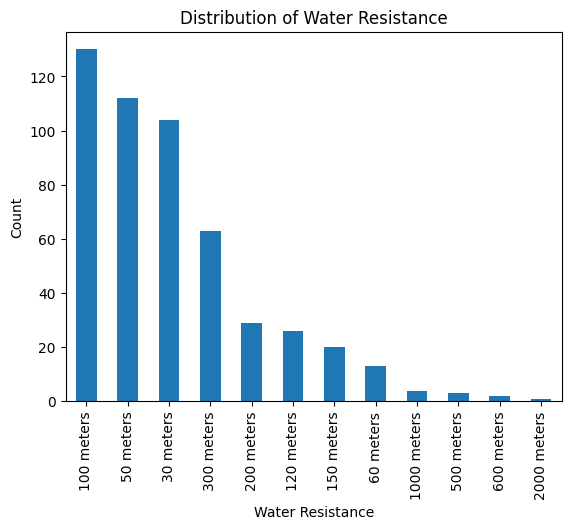

In [5]:
import matplotlib.pyplot as plt
#Count of water resistance
water_resistance_counts = df['Water Resistance'].value_counts()
water_resistance_counts.plot(kind='bar')
plt.xlabel('Water Resistance')
plt.ylabel('Count')
plt.title('Distribution of Water Resistance')
plt.show()


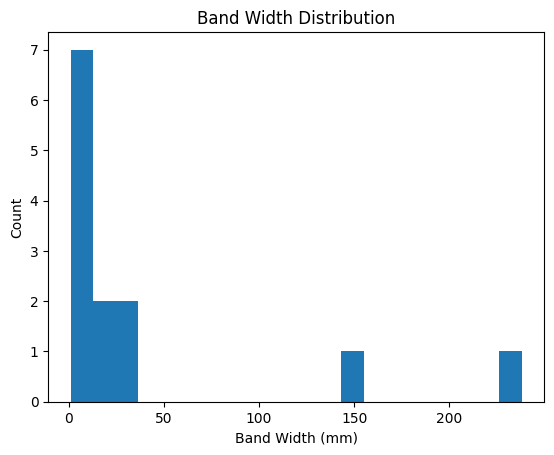

In [6]:
#Count of band width
band_width_counts = df['Band Width (mm)'].value_counts()
band_width_counts.plot(kind='hist', bins=20)
plt.xlabel('Band Width (mm)')
plt.ylabel('Count')
plt.title('Band Width Distribution')
plt.show()

In [9]:
#Average thickness of each crystal material
thickness_avg = df.groupby('Crystal Material')['Case Thickness (mm)'].mean().reset_index()
print(thickness_avg.head())

  Crystal Material  Case Thickness (mm)
0          Hardlex            13.233333
1         Hesalite            14.080769
2          Mineral            15.250000
3         Sapphire            11.497014


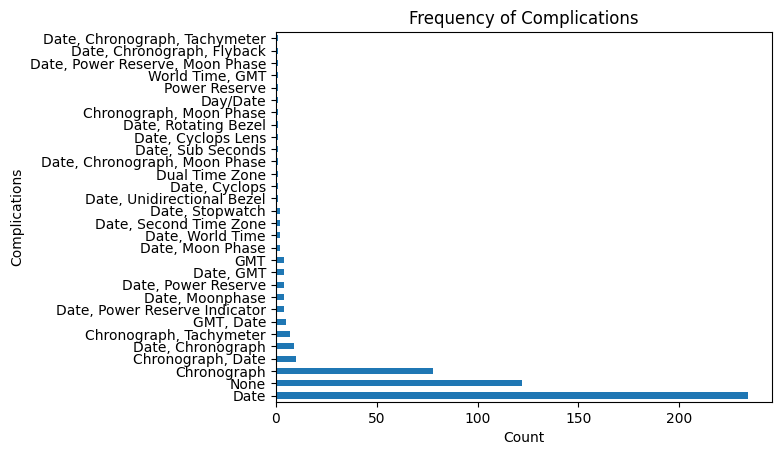

In [10]:
#Count of complications
complications_counts = df['Complications'].value_counts()
complications_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Complications')
plt.title('Frequency of Complications')
plt.show()

In [12]:
#Count of strap materials
strap_material_counts = df['Strap Material'].value_counts()
top_strap_materials = strap_material_counts.head(5)
print(top_strap_materials)

Strap Material
Leather            224
Stainless Steel    166
Rubber              74
Fabric              11
Canvas              10
Name: count, dtype: int64


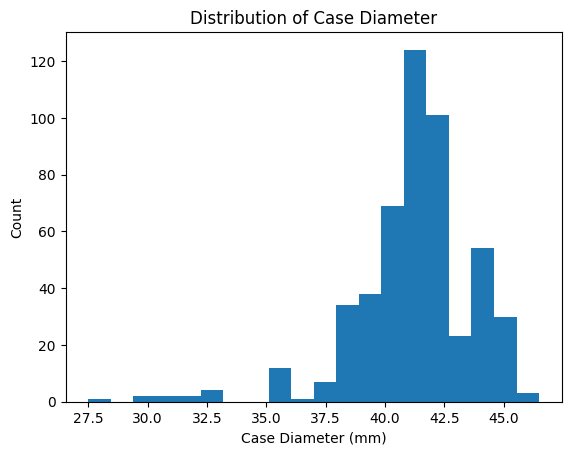

In [13]:
#Distribution of case diameter
plt.hist(df['Case Diameter (mm)'], bins=20)
plt.xlabel('Case Diameter (mm)')
plt.ylabel('Count')
plt.title('Distribution of Case Diameter')
plt.show()

In [25]:
import pandas as pd

# Assuming df contains your watch data
# Calculate average case thickness by brand
avg_case_thickness = df.groupby('Brand')['Case Thickness (mm)'].mean().reset_index()

# Display the data as a DataFrame
print(avg_case_thickness)

                  Brand  Case Thickness (mm)
0      A. Lange & Sohne             7.800000
1      A. Lange & Söhne             7.650000
2       Audemars Piguet            10.013158
3       Baume & Mercier            10.300000
4           Bell & Ross            10.075000
5             Blancpain            15.328621
6               Breguet             8.855769
7             Breitling            14.273125
8               Bulgari             5.266667
9                Bulova            17.500000
10              Cartier             9.080000
11              Chopard            12.464286
12              Citizen            14.000000
13  Frederique Constant            10.550000
14     Girard-Perregaux            10.880000
15   Glashütte Original            12.200000
16             Hamilton            10.125000
17               Hublot            13.209615
18                  IWC            12.626154
19     Jaeger-LeCoultre             8.259375
20          Jaquet Droz            11.968000
21        

In [26]:
import pandas as pd

# Assuming df contains your watch data
# Calculate summary statistics for Power Reserve by Brand
power_reserve_stats = df.groupby('Brand')['Power Reserve'].describe()

# Display the summary statistics as a DataFrame
print(power_reserve_stats)

                    count unique        top freq
Brand                                           
A. Lange & Sohne        1      1   45 hours    1
A. Lange & Söhne        2      2   72 hours    1
Audemars Piguet        38      3   60 hours   36
Baume & Mercier         1      1  120 hours    1
Bell & Ross             4      2   42 hours    2
Blancpain              29      1  120 hours   29
Breguet                26      7   65 hours    8
Breitling              16      3   38 hours   10
Bulgari                 3      2   55 hours    2
Bulova                  1      1        N/A    1
Cartier                19      2   42 hours   13
Chopard                14      3   42 hours    8
Citizen                 2      2   270 days    1
Frederique Constant     2      1   38 hours    2
Girard-Perregaux       20      2   54 hours   13
Glashütte Original      1      1   40 hours    1
Hamilton                4      1   80 hours    4
Hublot                 26      2   72 hours   16
IWC                 

In [27]:
import pandas as pd

# Assuming df contains your watch data
# Calculate summary statistics for Price (USD) by Movement Type
price_stats_by_movement = df.groupby('Movement Type')['Price (USD)'].describe()

# Display the summary statistics as a DataFrame
print(price_stats_by_movement)

              count unique    top freq
Movement Type                         
Automatic       442    167  7,500   25
Eco-Drive         2      2  1,200    1
Manual           51     34  5,500    5
Quartz           12     11  2,800    2


  Dial Color  Count
0      Black    217
1       Blue    136
2     Silver    118
3      White     33
4      Ivory      1
5  Champagne      1
6       Grey      1


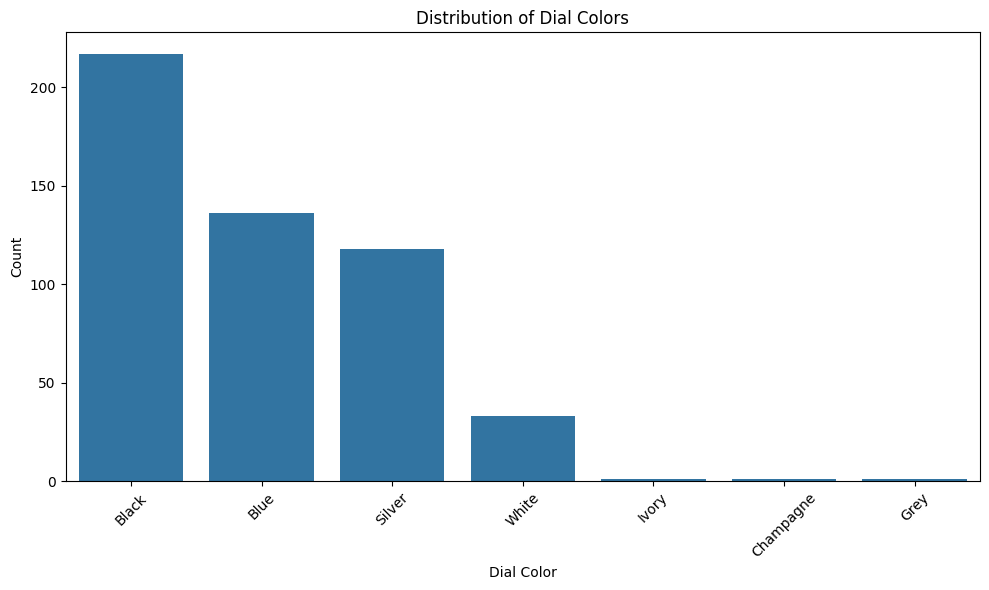

In [30]:
import pandas as pd

# Assuming df contains your watch data
# Calculate the distribution of dial colors
dial_color_counts = df['Dial Color'].value_counts().reset_index()
dial_color_counts.columns = ['Dial Color', 'Count']

# Display the distribution as a DataFrame
print(dial_color_counts)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Dial Color', y='Count', data=dial_color_counts)
plt.xlabel('Dial Color')
plt.ylabel('Count')
plt.title('Distribution of Dial Colors')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

<Axes: title={'center': 'Movement Type Distribution'}, xlabel='Movement Type'>

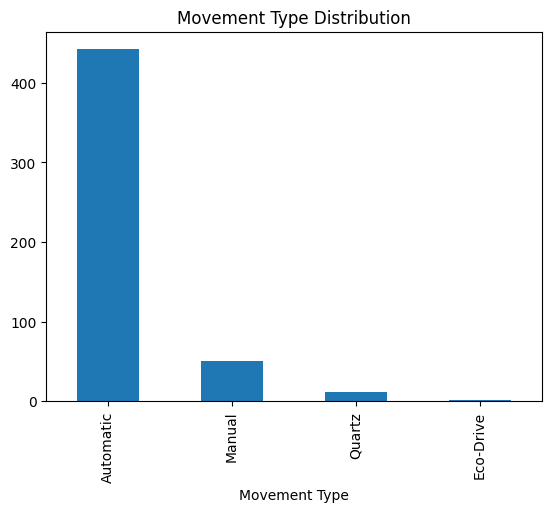

In [44]:
#Distribution each movement type
movement_counts = df['Movement Type'].value_counts()
movement_counts.plot(kind='bar', title='Movement Type Distribution')

<Axes: title={'center': 'Band Width vs. Price'}, xlabel='Band Width (mm)', ylabel='Price (USD)'>

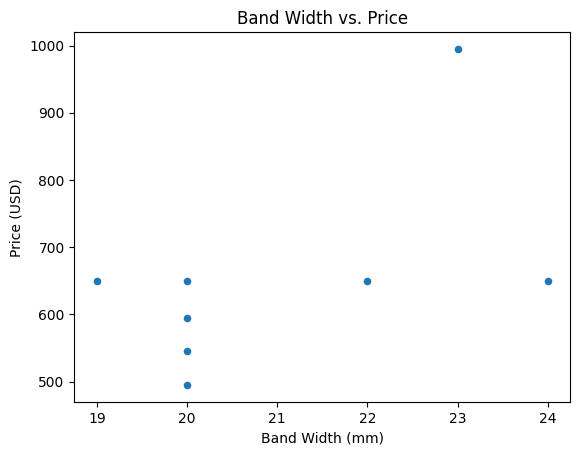

In [46]:
#Band Width Vs Price
df.plot.scatter(x='Band Width (mm)', y='Price (USD)', title='Band Width vs. Price')

<Axes: title={'center': 'Case Thickness Distribution'}, ylabel='Frequency'>

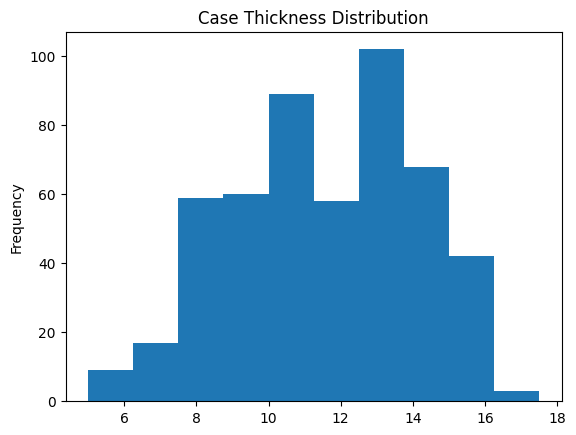

In [47]:
#Case Thickness Distribution
df['Case Thickness (mm)'].plot(kind='hist', bins=10, title='Case Thickness Distribution')

<Axes: title={'center': 'Band Width Distribution'}, xlabel='Band Width (mm)'>

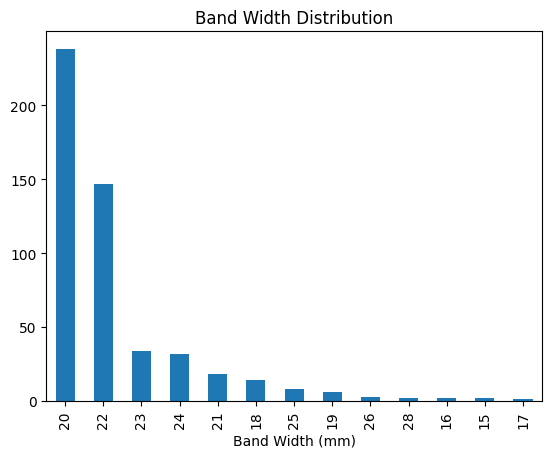

In [48]:
#Band Width Distribution
band_width_counts = df['Band Width (mm)'].value_counts()
band_width_counts.plot(kind='bar', title='Band Width Distribution')

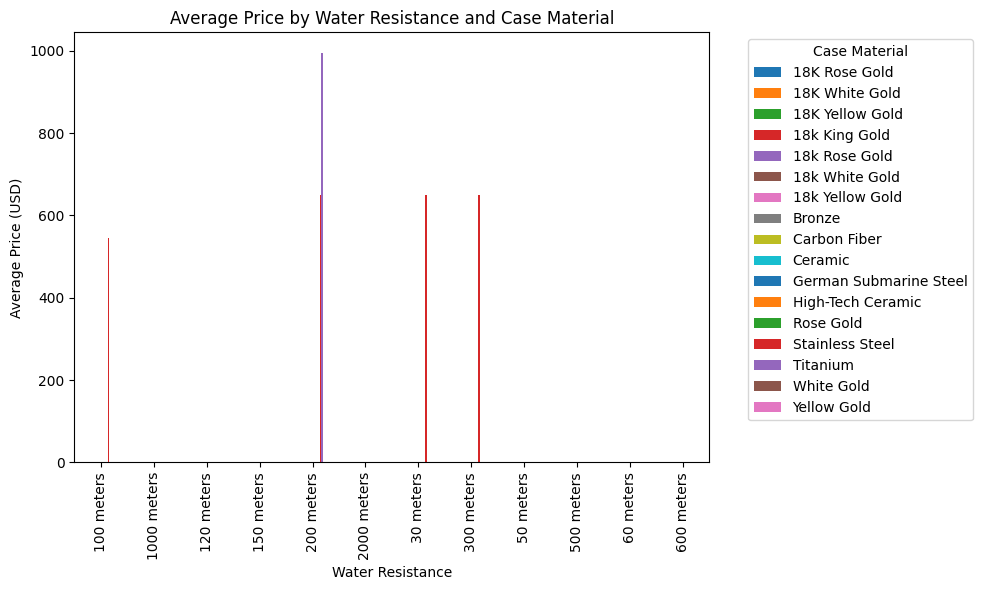

In [52]:
import matplotlib.pyplot as plt
#Average Price by Water Resistance and Case Material
avg_price_by_resistance_material = df.groupby(['Water Resistance', 'Case Material'])['Price (USD)'].mean().unstack()
avg_price_by_resistance_material.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Water Resistance')
plt.ylabel('Average Price (USD)')
plt.title('Average Price by Water Resistance and Case Material')
plt.legend(title='Case Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


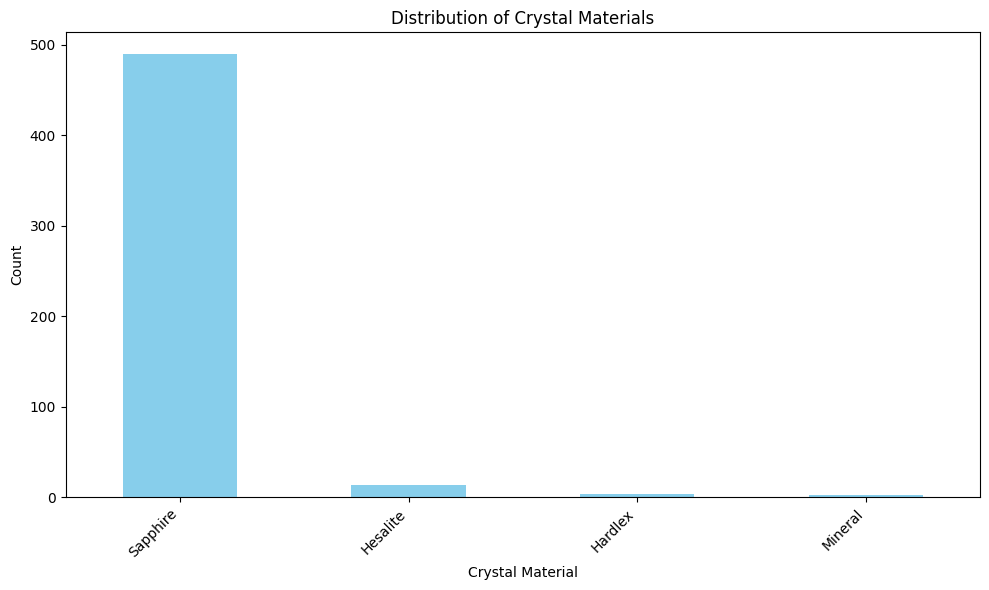

In [54]:
import matplotlib.pyplot as plt
#Distribution of Crystal Materials
crystal_counts = df['Crystal Material'].value_counts()
plt.figure(figsize=(10, 6))
crystal_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Crystal Material')
plt.ylabel('Count')
plt.title('Distribution of Crystal Materials')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Conclusion:
The project showcases a comprehensive analysis of watch data, highlighting key insights into brand popularity, material preferences, pricing strategies, and feature trends. Through visualizations and statistical summaries, the project provides actionable insights for stakeholders in the watch industry to make informed decisions and capitalize on emerging market trends. Further enhancements and advanced analytics can enhance the project's scope and utility in understanding and navigating the dynamic watch market landscape.